# Í∞êÏÑ±Î∂ÑÏÑù Í∏çÏ†ï ÎπÑÏú® ÎÑ£Í∏∞

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [184]:
review=pd.read_excel('Reviewata_clean.xlsx') # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
review.head()

Unnamed: 0        ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
0       13699  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
1       13778  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   4   
2       13970  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
3       14169  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
4       14903  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   4   

                                                Î¶¨Î∑∞ÎÇ¥Ïö©  
0  ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...  
1  Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...  
2                       Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!  
3  Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...  
4  Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...

In [185]:
df=pd.read_excel('Reviewata_clean.xlsx')
df.rename(columns={'Î¶¨Î∑∞ÎÇ¥Ïö©':'content'},inplace=True) 
df.content


0        ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...
1        Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...
2                             Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!
3        Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...
4        Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...
                               ...                        
57359             Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ
57360    Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...
57361                 Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî 
57362    Ìé

## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

- ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ ÌîÑÎ°úÍ∑∏Îû® nltkÏùÑ installÌïòÍ≥† Ïã§Ìñâ, ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû®Ïù∏ oktÏã§Ìñâ

In [186]:
len(df.content) # Ï†ÑÏ≤¥ Ïù∏Îç±Ïä§ Í∞úÏàò ÌååÏïÖ

57364

In [187]:
!pip install nltk

In [188]:
import nltk
from konlpy.tag import Okt #ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû® Î∂àÎü¨Ïò§Í∏∞
t=Okt()

In [189]:
df.content.astype('str') 

0        ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...
1        Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...
2                             Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!
3        Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...
4        Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...
                               ...                        
57359             Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ
57360    Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...
57361                 Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî 
57362    Ìé

In [190]:
content_text=''

for each_line in df.content.astype('str'):
    content_text=content_text + each_line + '\n'

In [191]:
print(df.content)
print(df.shape)

0        ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...
1        Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...
2                             Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!
3        Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...
4        Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...
                               ...                        
57359             Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ
57360    Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...
57361                 Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî 
57362    Ìé

## ÌòïÌÉúÏÜåÎ∂ÑÏÑù

- ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÌïòÎ©¥ÏÑú ÌòïÌÉúÏÜå Î∂ÑÏÑùÏù¥ Îêú Ï†ÑÏ≤¥ ÌÜ†ÌÅ∞ Í∞úÏàò, Ï§ëÎ≥µ Ï†úÏô∏ ÌÜ†ÌÅ∞ Í∞úÏàò Ï∂îÏ∂ú
- Ìï¥Îãπ ÌÜ†ÌÅ∞Îì§ÏùÑ Î∞îÌÉïÏúºÎ°ú Î¨∏Ïû•Ïùò Í∏çÏ†ï ÎπÑÏú®ÏùÑ Ï∂îÏ∂úÌïòÍ≤å Îê®


In [192]:
tokens_ko=t.morphs(content_text)  # ÌÜ†ÌÅ∞(Ï∂îÏ∂úÎêú Îã®Ïñ¥) Î∂àÎü¨Ïò§Í∏∞
tokens_ko

['ÎëêÍªò',
 'ÎèÑ',
 'Ï†ÅÎãπÌïòÍ≥†',
 'ÎîîÏûêÏù∏',
 'ÏÉâÍ∞ê',
 'Îã§',
 'Îßò',
 'Ïóê',
 'Îì§Ïñ¥Ïò§',
 'Í∞ÄÍ≤©',
 'ÎèÑ',
 'Ï†ÄÎ†¥ÌïòÍ≥†',
 'ÏûòÏÇ∞Í≤É',
 'Í∞ôÏïÑÏöî',
 '!!',
 'Îã¥',
 'Ïóê',
 'Îã§Î•∏',
 'ÏÉâÎèÑ',
 'ÏÇ¨Í≥†Ïã∂Ïñ¥Ïöî',
 '\n',
 'Îî±',
 'Í∏∞Î≥∏',
 'ÏÖîÏ∏†',
 'ÌïòÍ≤å',
 'Ï¢ãÏïÑÏöî',
 '!',
 'Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞',
 'ÎÑàÎ¨¥',
 'Îπ≥Îπ≥',
 'Ìïú',
 'ÏÜåÏû¨',
 'ÎèÑ',
 'ÏïÑÎãåÍ≤å',
 'Îî±',
 'Ïó¨Î¶¨Ìï¥',
 'Î≥¥Ïù¥',
 'Í≥†',
 'Ï¢ãÏïÑÏöî',
 '„Öé„Öé',
 '\n',
 'ÏÉùÍ∞Å',
 'Î≥¥Îã§',
 'Ïïà',
 'Ïª§ÏÑú',
 'Ïó¨Í∏∞Ï†ÄÍ∏∞',
 'ÏûÖÍ∏∞',
 'Ï¢ãÏïÑÏöî',
 'üëçüèªüëçüèª',
 '\n',
 'Ï≤≠Î∞îÏßÄ',
 'ÏóêÎèÑ',
 'Ïñ¥Ïö∏Î¶¨Í≥†',
 'Ïä¨ÎûôÏä§',
 'ÏóêÎèÑ',
 'Ïñ¥Ïö∏Î¶¨Í≥†',
 'Ï¢ãÏïÑÏöî',
 '!!',
 '\n',
 'Ï≤≠Î∞îÏßÄ',
 'Ïóê',
 'ÏûÖÏñ¥ÎèÑ',
 'ÏòàÏÅòÍ≥†',
 'ÏπòÎßà',
 'Îûë',
 'ÏûÖÏñ¥ÎèÑ',
 'ÏòàÎªêÏöî',
 '!!',
 'Ïπ¥Îùº',
 'Í∞Ä',
 'Ïª§ÏÑú',
 'Í∏∞Î≥∏',
 'ÌÖú',
 'Ïù¥Ïñ¥ÎèÑ',
 'ÎßàÎÉ•',
 'Î¨¥ÎÇú',
 'Ìï¥Î≥¥Ïù¥ÏßÄÎßåÏùÄ',
 'ÏïäÏïÑÏÑú',
 'Ï¢ãÏïòÏñ¥Ïö©',
 '\n',
 'Î≥¥Îì§Î≥¥Îì§ÌïòÎãà',
 'Îî±',
 'Ï¢ãÏïÑÏö©',
 '„Öé',
 'ÏÜåÏû¨',
 'ÌäπÏÑ±

In [193]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens)) # ÌÜ†ÌÅ∞ Ï†ÑÏ≤¥ Í∞úÏàò
print(len(set(ko.tokens))) # ÌÜ†ÌÅ∞ uniqueÍ∞úÏàò (Ï§ëÎ≥µx)

1186026
32430


### ÎπàÏ∂ú ÏÉÅÏúÑ 100Í∞ú Îã®Ïñ¥ ÎΩëÏïÑÎÇ¥Í∏∞ (Î∂àÏö©Ïñ¥Ìè¨Ìï®)

In [194]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100) # Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥ 100Í∞ú

[('\n', 71510),
 ('Ïù¥', 25442),
 ('Ïóê', 23946),
 ('ÎèÑ', 21139),
 ('ÎÑàÎ¨¥', 14627),
 ('!', 12810),
 ('Í∞Ä', 12800),
 ('Í∞ôÏïÑÏöî', 10203),
 ('Ïûò', 9943),
 ('Íµ¨Îß§', 9466),
 ('ÏùÄ', 9101),
 ('.', 8580),
 ('Ï¢ãÏïÑÏöî', 8556),
 ('Ìïè', 8367),
 ('ÏòàÎªêÏöî', 7578),
 ('Îî±', 7155),
 ('Îäî', 6770),
 ('Ï¢Ä', 6388),
 ('Ïù¥ÎªêÏöî', 6187),
 ('ÏÉùÍ∞Å', 6150),
 ('Ïöî', 6122),
 ('„Öé„Öé', 5963),
 ('Ïò∑', 5794),
 ('Î≥¥Îã§', 5727),
 ('Îêú', 5636),
 ('(', 5620),
 (')', 5611),
 ('-', 5490),
 (':', 5429),
 ('Ìèâ', 5234),
 ('ÎÑ§Ïù¥Î≤Ñ', 5227),
 ('ÌéòÏù¥', 5223),
 ('Îì±Î°ù', 5219),
 ('ÏûÖÍ∏∞', 5208),
 ('Í≤É', 5081),
 ('!!', 4684),
 ('ÏùÑ', 4593),
 ('ÏúºÎ°ú', 4544),
 ('Îçî', 4473),
 ('Ïïà', 4407),
 ('~', 4388),
 ('Î°ú', 4283),
 ('..', 4041),
 ('Îßò', 4009),
 ('ÌóàÎ¶¨', 4007),
 ('ÏÇ¨Ïù¥Ï¶à', 3953),
 ('Îã§', 3859),
 ('ÏÉâÏÉÅ', 3796),
 ('„Ö†„Ö†', 3741),
 ('Ïû¨Ïßà', 3639),
 ('ÎäêÎÇå', 3620),
 ('Î∞∞ÏÜ°', 3613),
 ('ÏßÑÏßú', 3611),
 ('Ìïú', 3558),
 ('Í∏∏Ïù¥', 3511),
 ('Ï°∞Í∏à', 3499),
 ('\n\n\n', 3428),
 ('Ï

### Stop words(Î∂àÏö©Ïñ¥)Î•º Ï†ïÏùò ÌõÑ Ï†úÍ±∞ÌïòÏó¨ Î≥¥Îã§ Í∞ùÍ¥ÄÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÌååÏïÖ

In [195]:
#Î∂àÏö©Ïñ¥ : Ïù∏ÌÑ∞ÎÑ∑ Í≤ÄÏÉâÏãú Í≤ÄÏÉâÏö©Ïñ¥Î°ú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî Îã®Ïñ¥, Í¥ÄÏÇ¨, Ï†ÑÏπòÏÇ¨, Ï°∞ÏÇ¨, Ï†ÑÏπòÏÇ¨ Îì± Í≤ÄÏÉâ ÏÉâÏù∏ Îã®Ïñ¥Î°ú ÏùòÎØ∏Í∞Ä ÏóÜÎäî Îã®Ïñ¥
stop_words = ['.','Í∞Ä','Ïöî','ÎãµÎ≥Ä','...','ÏùÑ','Ïàò','Ïóê','ÏßàÎ¨∏','Ï†ú','Î•º','Ïù¥','ÎèÑ','Ï¢ã','1','Îäî','Î°ú','ÏúºÎ°ú','2','Í≤É','ÏùÄ','Îã§',',','ÎãàÎã§','ÎåÄ','Î•º','2017','Îì§','Îç∞','..','Ïùò','Îïå','Í≤†','Í≥†','Í≤å','ÎÑ§Ïöî','Ìïú','Ïùº','Ìï†','10','?','ÌïòÎäî','06','Ï£º','Î†§Í≥†','Ïù∏Îç∞','Í±∞','Ï¢Ä','ÎäîÎç∞','-','„Öé„Öé','ÌïòÎÇò','Ïù¥ÏÉÅ','20','Î≠ê','Íπå','ÏûàÎäî','Ïûò','ÏäµÎãàÎã§','Îã§Î©¥','Ìñà','Ï£ºÎ†§','ÏßÄ','Ïûà','Î™ª','ÌõÑ','Ï§ë','Ï§Ñ','6','Í≥º','Ïñ¥Îñ§','Í∏∞Î≥∏','!!','Îã®Ïñ¥','ÎùºÍ≥†','Ï§ëÏöîÌïú','Ìï©','Í∞ÄÏöî','....','Î≥¥Ïù¥','ÎÑ§','Î¨¥ÏßÄ']

#stop_wordsÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÌÜ†ÌÅ∞Îì§Îßå Ï∂îÏ∂ú
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('\n', 71510),
 ('ÎÑàÎ¨¥', 14627),
 ('!', 12810),
 ('Í∞ôÏïÑÏöî', 10203),
 ('Íµ¨Îß§', 9466),
 ('Ï¢ãÏïÑÏöî', 8556),
 ('Ìïè', 8367),
 ('ÏòàÎªêÏöî', 7578),
 ('Îî±', 7155),
 ('Ïù¥ÎªêÏöî', 6187),
 ('ÏÉùÍ∞Å', 6150),
 ('Ïò∑', 5794),
 ('Î≥¥Îã§', 5727),
 ('Îêú', 5636),
 ('(', 5620),
 (')', 5611),
 (':', 5429),
 ('Ìèâ', 5234),
 ('ÎÑ§Ïù¥Î≤Ñ', 5227),
 ('ÌéòÏù¥', 5223),
 ('Îì±Î°ù', 5219),
 ('ÏûÖÍ∏∞', 5208),
 ('Îçî', 4473),
 ('Ïïà', 4407),
 ('~', 4388),
 ('Îßò', 4009),
 ('ÌóàÎ¶¨', 4007),
 ('ÏÇ¨Ïù¥Ï¶à', 3953),
 ('ÏÉâÏÉÅ', 3796),
 ('„Ö†„Ö†', 3741),
 ('Ïû¨Ïßà', 3639),
 ('ÎäêÎÇå', 3620),
 ('Î∞∞ÏÜ°', 3613),
 ('ÏßÑÏßú', 3611),
 ('Í∏∏Ïù¥', 3511),
 ('Ï°∞Í∏à', 3499),
 ('\n\n\n', 3428),
 ('ÏÉâ', 3407),
 ('Ïù¥Îùº', 3361),
 ('ÌñàÎäîÎç∞', 3201),
 ('ÏÉâÍ∞ê', 3191),
 ('ÎßéÏù¥', 3180),
 ('Ïó¨Î¶¨', 3102),
 ('Î∂ÄÎ∂Ñ', 3071),
 ('Îì§Ïñ¥Ïöî', 3024),
 ('ÏÇ¨ÏßÑ', 2962),
 ('ÎÑò', 2924),
 ('Ïù¥Îûë', 2913),
 ('ÏûÖÍ≥†', 2672),
 ('ÌïòÍ≥†', 2606),
 ('Ïù¥ÏóêÏöî', 2573),
 ('Îûë', 2565),
 ('Îã§Î•∏', 2560),
 ('\n\n', 2559),
 ('ÏÇ¥Ï

### Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Í≤∞Í≥º, Î∂àÏö©Ïñ¥Í∞Ä Îçî Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Î∂àÏö©Ïñ¥Ïóê Ìè¨Ìï®ÌïòÏó¨ Ìï¥Îãπ Îã®Ïñ¥ Ï†úÍ±∞

In [196]:
#Î∂àÏö©Ïñ¥ Ï∂îÍ∞ÄÌïòÏó¨ Ïù¥Í≤ÉÍπåÏßÄ Î∞òÏòÅÎêú ÌÜ†ÌÅ∞ Ï∂îÏ∂ú
review_stopwords=['\n','!','(',')',':','~','\n\n\n','\n\n','ÎÑò','Îûë','ÏûÖ','Ï†Ä','Îùº','Ïö©','ÏÑú','Îßå','Îî±','Îêú','Îçî','Ïïà','Îßò','~~','!!!','„Öé„Öé„Öé','„Öé','„Ö†','Íµ¨','Î∂Ñ','„Öú„Öú']
for word in review_stopwords:
    stop_words.append(word)

In [197]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('ÎÑàÎ¨¥', 14627),
 ('Í∞ôÏïÑÏöî', 10203),
 ('Íµ¨Îß§', 9466),
 ('Ï¢ãÏïÑÏöî', 8556),
 ('Ìïè', 8367),
 ('ÏòàÎªêÏöî', 7578),
 ('Ïù¥ÎªêÏöî', 6187),
 ('ÏÉùÍ∞Å', 6150),
 ('Ïò∑', 5794),
 ('Î≥¥Îã§', 5727),
 ('Ìèâ', 5234),
 ('ÎÑ§Ïù¥Î≤Ñ', 5227),
 ('ÌéòÏù¥', 5223),
 ('Îì±Î°ù', 5219),
 ('ÏûÖÍ∏∞', 5208),
 ('ÌóàÎ¶¨', 4007),
 ('ÏÇ¨Ïù¥Ï¶à', 3953),
 ('ÏÉâÏÉÅ', 3796),
 ('„Ö†„Ö†', 3741),
 ('Ïû¨Ïßà', 3639),
 ('ÎäêÎÇå', 3620),
 ('Î∞∞ÏÜ°', 3613),
 ('ÏßÑÏßú', 3611),
 ('Í∏∏Ïù¥', 3511),
 ('Ï°∞Í∏à', 3499),
 ('ÏÉâ', 3407),
 ('Ïù¥Îùº', 3361),
 ('ÌñàÎäîÎç∞', 3201),
 ('ÏÉâÍ∞ê', 3191),
 ('ÎßéÏù¥', 3180),
 ('Ïó¨Î¶¨', 3102),
 ('Î∂ÄÎ∂Ñ', 3071),
 ('Îì§Ïñ¥Ïöî', 3024),
 ('ÏÇ¨ÏßÑ', 2962),
 ('Ïù¥Îûë', 2913),
 ('ÏûÖÍ≥†', 2672),
 ('ÌïòÍ≥†', 2606),
 ('Ïù¥ÏóêÏöî', 2573),
 ('Îã§Î•∏', 2560),
 ('ÏÇ¥Ïßù', 2549),
 ('Î∞îÏßÄ', 2536),
 ('ÎîîÏûêÏù∏', 2483),
 ('ÏÜåÏû¨', 2455),
 ('Í∑ºÎç∞', 2402),
 ('ÎùºÏù∏', 2326),
 ('Ï¢ãÍ≥†', 2264),
 ('Ïù¥ÏÅòÍ≥†', 2190),
 ('Í∑∏ÎûòÎèÑ', 2185),
 ('ÏûÖÏúºÎ©¥', 2185),
 ('ÏÉâÎèÑ', 2153),
 ('ÏòàÏÅòÍ≥†', 2053),

- ÎπàÏ∂úÎêú ÏÉÅÏúÑ Îã®Ïñ¥Îì§ÏùÑ graphviz ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÏó¨ ÏûêÏ£º Ï∂îÏ∂úÎêòÎäî Îã®Ïñ¥Ïùò ÎπàÎèÑÏàò ÌååÏïÖ

In [198]:
!pip install graphviz

## Ï¥ù Îã®Ïñ¥ ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôîÌïòÍ∏∞

1. graphviz

2. wordcloud



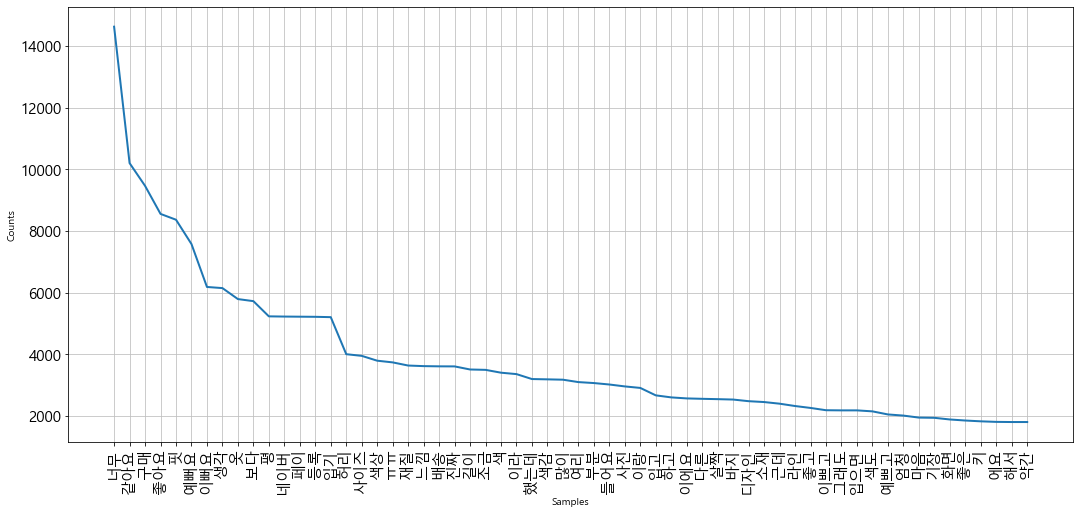

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # Ìè∞Ìä∏ Ï†ÅÏö©
rc('font',family=font)

plt.figure(figsize=(18,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ko.plot(60) #Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥ 60Í∞úÎßå
plt.show()

#### Îã®Ïñ¥Îì§ÏùÑ ÏÇ¥ÌîºÎäî ÏùòÏùò

- Í∏∞Ï°¥Ïóê ÏïåÎçò Í≤ÉÏùÑ Îã§Ïãú Î∞úÍ≤¨, Ïñ¥Îñ§ Ï†êÏóêÏÑú Ïû•Ï†êÏù¥ ÏûàÍ≥†, Îã®Ï†êÏù¥ ÏûàÎäîÏßÄ ÎêòÎèåÏïÑÎ≥º Ïàò ÏûàÏùå
- ÏòàÏ†ÑÏóê Î™∞ÎûêÎçò ÏÉàÎ°úÏö¥ ÏÜåÎπÑÏûêÏùò ÎãàÏ¶àÎ•º ÌååÏïÖÌïòÎäî Í≤É.

## ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú ÎπàÎèÑÏàò ÎÇòÌÉÄÎÇ¥Í∏∞

In [200]:
!pip install wordcloud

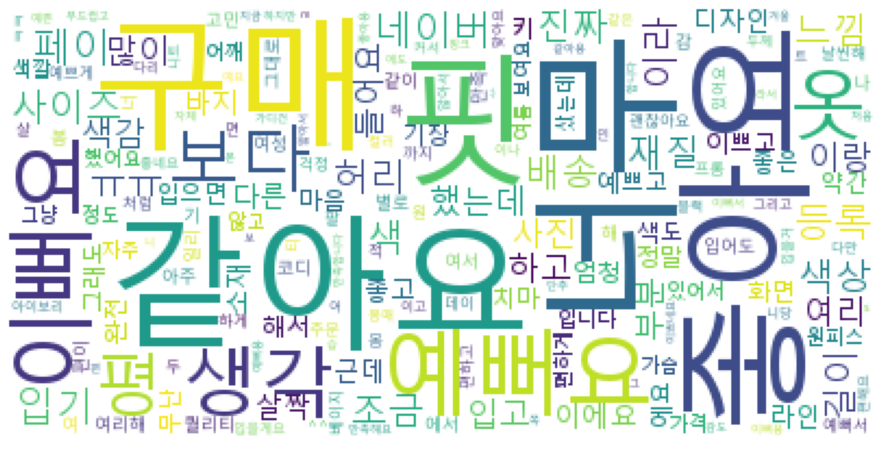

In [201]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## ÌÖçÏä§Ìä∏ Í∏çÏ†ï / Î∂ÄÏ†ï ÏòàÏ∏° Î™®Îç∏ ÎßåÎì§Í∏∞

### 1. ÌèâÏ†ê Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò / ÌòïÌÉúÏÜå Î∂ÑÏÑù Ìï®Ïàò Ï†ïÏùò

Ïù¥Ï†Ñ ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Îïå ÏÇ¥Ìé¥Î≥¥ÏïòÎìØÏù¥ 1, 2Ï†êÏùÄ Î≥ÑÎ°ú ÏóÜÎã§. Í∑∏ÎûòÏÑú 3Ï†êÎèÑ Î∂ÄÏ†ïÏúºÎ°ú Î≥¥Í≥† ÌïôÏäµÏãúÌÇ§Îäî Í≤ÉÏù¥ Îç∞Ïù¥ÌÑ∞ Î≤®Îü∞Ïä§Ïóê Ï†ÅÌï©ÌïòÎã§. 1,2,3Ï†êÏùÑ Î∂ÄÏ†ïÏúºÎ°ú, 4,5Ï†êÏùÄ Í∏çÏ†ïÏúºÎ°ú ifÎ¨∏ÏùÑ Í±∏Ïñ¥Ï£ºÏóàÎã§.

In [202]:
#ÌèâÏ†ê Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def star_preprocessing(value):
    #value = int(text), 1,2Ï†êÏù¥ Î≥ÑÎ°ú ÏóÜÏñ¥ÏÑú 3Ï†êÍπåÏßÄ Î∂ÄÏ†ïÏúºÎ°ú Î≥¥Í∏∞
    if value<=3:
        return 0
    else : 
        return 1
    
#ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ìï®Ïàò Okt(Íµ¨ twitterÏÇ¨Ïö©)
def tokenizer(text):
    okt=Okt()
    return okt.morphs(text)



In [203]:
#ÏàòÏßëÌïú Îç∞Ïù¥ÌÑ∞ ÏùΩÏñ¥Ïò¥
df=pd.read_excel('Reviewata_clean.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57364 non-null  int64 
 1   ÏÉÅÌíàÎ™Ö         57364 non-null  object
 2   ÌèâÏ†ê          57364 non-null  int64 
 3   Î¶¨Î∑∞ÎÇ¥Ïö©        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [204]:
dfc=df.copy() #ÎßåÏïΩÏùò Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥ Ïπ¥ÌîºÎ≥∏ ÎßåÎì§Í∏∞

In [205]:
dfc['ÌèâÏ†ê']=dfc['ÌèâÏ†ê'].apply(star_preprocessing) 
#ÌèâÏ†ê ÏπºÎüºÏóê star_preprocessingÌï®Ïàò Ï†ÅÏö©

In [206]:
dfc.dropna(axis=0,how='any',inplace=True) #naÍ∞Ä ÏûàÎäî Ïù∏Îç±Ïä§ Ï†úÍ±∞

In [207]:
dfc

Unnamed: 0        ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
0           13699  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   1   
1           13778  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   1   
2           13970  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   1   
3           14169  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   1   
4           14903  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   1   
...           ...        ...  ..   
57359       52139    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   1   
57360       53947    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   1   
57361       55343    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   1   
57362       55472    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   1   
57363       55476    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   1   

                                                    Î¶¨Î∑∞ÎÇ¥Ïö©  
0      ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...  
1      Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...  
2                           Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!  
3      Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...  
4      Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...  
...                                                  ...  
57359           Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ  
57360  Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...  
57361               Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî   
57362  Ìé∏ÌïòÍ≤åÏûÖÍ≥†ÏûáÏäµÎãàÎã§~\n\n(2020-08-29 22:49:28 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ Ìéò...  
57363  Ìé∏Ìï¥ÏÑú ÏûêÏ£ºÏûÖÍ≥†ÏûáÏäµÎãàÎã§\n\n(2020-08-29 22:51:14 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ...  

[57363 rows x 4 columns]

In [208]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57363 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57363 non-null  int64 
 1   ÏÉÅÌíàÎ™Ö         57363 non-null  object
 2   ÌèâÏ†ê          57363 non-null  int64 
 3   Î¶¨Î∑∞ÎÇ¥Ïö©        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [209]:
text_list=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'].tolist()
star_list=dfc['ÌèâÏ†ê'].tolist()


In [210]:
# 80%Îäî train, 20%Îäî testÎç∞Ïù¥ÌÑ∞Î°ú ÏÑ§Ï†ï
from sklearn.model_selection import train_test_split
text_train,text_test,star_train,star_test=train_test_split(text_list,star_list,test_size=0.2,random_state=0)

In [211]:
def step1_data_preprocessing():
    df=pd.read_excel('Reviewata_clean.xlsx')
    df['ÌèâÏ†ê']=df['ÌèâÏ†ê'].apply(star_preprocessing)

    dfc=df.copy()
    dfc.dropna(axis=0,how='any',inplace=True)
    #ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎààÎã§.
    text_list=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'].tolist()
    star_list=dfc['ÌèâÏ†ê'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    text_train,text_test,star_train,star_test=train_test_split(text_list,star_list,test_size=0.2,random_state=0)
    
    return text_train,text_test,star_train,star_test

In [212]:
text_train

['ÏÉâÏÉÅÎèÑ ÎòëÍ∞ôÍ≥† ÎÑàÎ¨¥ Ïù¥ÎªêÏÑú Îã§Î•∏ÏÉâÎèÑ ÏÇ¨Í≥†Ïã∂Ïñ¥Ïöî',
 'ÏòàÎªêÏöî ÏûòÏûÖÏóàÏñ¥Ïöî~~!! ÌóàÎ¶¨Îäî ÌÉÄÏù¥Ìä∏Ìï®',
 'ÌóàÎ¶¨Ï™ΩÏù¥ ÏïΩÍ∞Ñ Îú®ÎäîÍ≤ÉÎπºÍ≥†Îäî Ï¢ãÏäµÎãàÎã§!',
 '„Ö†„Ö†„Ö†„Ö†„Ö†ÏßÑÏßúÎÑàÎ¨¥ÏòàÎªêÏöî Îã§Î•∏ÏÉâÏÉÅÏùÄ ÏïàÎÇòÏò¨ÍπåÏö§ „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†',
 'Ïñ¥Íπ®ÏÑ†Ïù¥ ÎÖ∏Ï∂úÎêòÎã§ Î≥¥Îãà Ìõ®Ïî¨ Ïó¨Î¶¨Ìï¥ Î≥¥Ïù¥Íµ¨ Î∞îÏßÄÎûë ÏûÖÏúºÎ©¥ ÎÑò Ïù¥ÎøåÎÑ§Ïö©„Öé„Öé',
 'ÏÇ¨Ïù¥Ï¶àÎäî ÏÉùÍ∞ÅÎ≥¥Îã§ Ï°∞Í∏à ÏûëÏïÑÏÑú ÏàòÏÑ†Ìï¥ÏÑú ÏûÖÏóáÏñ¥Ïöî „Öú„Öú ÌïèÏùÄ ÏòàÎªêÏöî „Öã Î∞∞ÏÜ°ÏùÄ ÎÑò Îπ®ÎùºÏÑú Ï¢ãÏïóÏñ¥Ïöî „Öã\n\n(2020-11-20 00:02:03 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ ÌéòÏù¥ Íµ¨Îß§Ìèâ)',
 'Ïùå ..ÏÉùÍ∞ÅÌñàÎçò Í≤ÉÎ≥¥Îã§ Í∞ÄÏä¥ Ï™ΩÏù¥ ÌååÏòÄÏñ¥Ïöî ÏÇ¨ÏßÑÏóêÏÑú Í∞ÄÏä¥Í≥® Î≥¥ÏùºÏ†ïÎèÑ ? ÏáÑÍ≥® Ï™ΩÏúºÎ°ú ÌååÏó¨ÏûàÎäî Í±¥ ÏòàÎªêÏöî Í∑ºÎç∞ ÏÉùÍ∞ÅÎ≥¥Îã§ ÌùêÎ¨ºÌùêÎ¨ºÌïú ÎäêÎÇåÏù¥Í≥†„Ö†„Ö† Í∏∞ÎåÄÎ≥¥Îã§Îäî ÏùºÌïòÏòÄÏùå',
 'ÌôîÎ©¥Ïù¥Îûë ÎòëÍ∞ôÏïÑÏöî Í∞ÄÍ≤©ÎèÑ Ï∞©Ìï¥ÏÑú ÏÑ∏Í∞ú ÏÉÄÎäîÎç∞ ÎßòÏóê Îì§ÏïÑÏöî ÍµêÎ≥µÏù¥ÏóêÏöî „Öé„Öé',
 'Î∞∞ÏÜ° ÏóÑÏ≤≠ Îπ†Î•¥Íµ¨ ÎÑò Ïù¥ÎªêÏöî „Ö†„Ö† Î¨¥Ï°∞Í±¥ ÏÇ¨ÏÑ∏ÏóΩ..„Ö†',
 '

In [213]:
#Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Îã®Ïñ¥ ÏÇ¨Ï†ÑÏúºÎ°ú ÎßåÎì§Í≥†, Í∞Å Îã®Ïñ¥Ïùò ÎπàÎèÑÏàòÎ•º Í≥ÑÏÇ∞Ìïú ÌõÑ Î≤°ÌÑ∞ÌôîÌïòÎäî Í∞ùÏ≤¥ ÏÉùÏÑ±
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(lowercase=False,tokenizer=tokenizer)
tfidf.fit_transform(text_train)

<45890x29566 sparse matrix of type '<class 'numpy.float64'>'
	with 843726 stored elements in Compressed Sparse Row format>

In [214]:
#Î¨∏Ïû•Î≥Ñ ÎÇòÏò§Îäî Îã®Ïñ¥ÏàòÎ•º ÏÑ∏ÏÑú ÏàòÏπòÌôî, Î≤°ÌÑ∞ÌôîÌï¥ÏÑú ÌïôÏäµÏùÑ ÏãúÌÇ¥
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
logistic=LogisticRegression(C=10.0,penalty='l2',random_state=0)

pipe=Pipeline([('vect',tfidf),('clf',logistic)])
#ÌïôÏäµ
pipe.fit(text_train,star_train)
#ÌïôÏäµ Ï†ïÌôïÎèÑ Ï∏°Ï†ï
y_pred=pipe.predict(text_test)
print(accuracy_score(star_test,y_pred))
#ÌïôÏäµÎêú Î™®Îç∏ Ï†ÄÏû•
with open('pipe.dat','wb') as fp: #Î∞îÏù¥ÎÑàÎ¶¨Ïì∞Í∏∞Î™®Îìú
    pickle.dump(pipe,fp)

print('Ï†ÄÏû•ÏôÑÎ£å')

C:\anaconda\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9307068770156018
Ï†ÄÏû•ÏôÑÎ£å


ÌïôÏäµÏóê ÏÇ¨Ïö©Îêú ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌÅ¨Í≤å 2Í∞ÄÏßÄÏù¥Îã§.

1. Logistic Regression

- Í∏çÏ†ï/Î∂ÄÏ†ï classificationÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïòÎã§.

2. TFIDF

- Îã®Ïñ¥Í∞Ä Ïñ¥Îñ§ Î¨∏ÏÑúÏóê ÏñºÎßàÎÇò Îì§Ïñ¥ÏûàÎäîÏßÄÏóê Îî∞Îùº Î¨∏ÏÑúÏùò ÌäπÏÑ±ÏùÑ Í∑úÏ†ïÌï¥Ï£ºÎäî ÏïåÍ≥†Î¶¨Ï¶òÏù¥Îã§.

- TFÎäî Îã®Ïñ¥Í∞Ä ÎßéÏùÑÏàòÎ°ù Í∞ÄÏ§ëÏπòÎ•º ÎÜíÏó¨Ï£ºÎäî ÏïåÍ≥†Î¶¨Ï¶òÏù¥Í≥†, IDFÎäî Î¨∏ÏÑúÏóê ÌäπÏ†ï Îã®Ïñ¥Í∞Ä Ìù¨ÏÜåÌï†ÏàòÎ°ù Í∑∏ Î¨∏ÏÑúÏùò ÌäπÏÑ±ÏùÑ Í∑úÏ†ïÌï¥Ï£ºÎäî ÏïåÍ≥†Î¶¨Ï¶òÏù¥Îã§.

- ÏöîÏïΩÌïòÎ©¥ TFxIDFÎäî ÌäπÏ†ï Î¨∏ÏÑúÏóê Ìù¨ÏÜåÌïú Îã®Ïñ¥Í∞Ä ÎßéÏùÑÏàòÎ°ù Í∑∏ Î¨∏ÏÑúÍ∞Ä Ïñ¥Îñ§ ÌäπÏÑ±Ïù∏ÏßÄ ÌåêÎã®Ïù¥ Í∞ÄÎä•ÌïòÎã§.

-> TFIDFÎ°ú ÌäπÏ†ï Î¨∏ÏÑúÏóê ÎåÄÌïú ÌäπÏÑ±ÏùÑ ÏòàÏ∏°ÌïòÍ≥†, Logistic ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Î¶¨Î∑∞Í∞Ä Í∏çÏ†ïÏù∏ÏßÄ Î∂ÄÏ†ïÏù∏ÏßÄ Î∂ÑÎ•òÌï¥Ï£ºÎäî Í≤ÉÏù¥Îã§.

In [215]:
def step2_learning(X_train,X_test,y_train,y_test):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf=TfidfVectorizer(lowercase=False,tokenizer=tokenizer)
    
    #Î¨∏Ïû•Î≥Ñ ÎÇòÏò§Îäî Îã®Ïñ¥ÏàòÎ•º ÏÑ∏ÏÑú ÏàòÏπòÌôî, Î≤°ÌÑ∞ÌôîÌï¥ÏÑú ÌïôÏäµÏùÑ ÏãúÌÇ¥
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    logistic=LogisticRegression(C=10.0,penalty='l2',random_state=0)

    pipe=Pipeline([('vect',tfidf),('clf',logistic)])
    #ÌïôÏäµ
    pipe.fit(X_train,y_train)
    #ÌïôÏäµ Ï†ïÌôïÎèÑ Ï∏°Ï†ï
    y_pred=pipe.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    #ÌïôÏäµÎêú Î™®Îç∏ Ï†ÄÏû•
    with open('pipe.dat','wb') as fp:
        pickle.dump(pipe,fp)
        
    print('Ï†ÄÏû•ÏôÑÎ£å')

In [216]:
with open('pipe.dat','rb') as fp:
    pipe=pickle.load(fp)

### 5000Í∞úÏî© ÎÇòÎàÑÏñ¥ arrayÎ∞∞Ïó¥Î°ú ÎßåÎì† Îã§Ïùå, Ïù¥Í≤ÉÎì§ÏùÑ Ìï©Ï≥ê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÏãúÏºú Í∏çÏ†ïÌôïÎ•†Ïù¥ÎùºÎäî ÏÉàÎ°úÏö¥ Ìï≠Î™©ÏùÑ ÎßåÎì§Ïñ¥ Ï∂îÍ∞Ä

In [217]:
import numpy as np
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][:5000]

In [218]:
print(pipe.predict_proba(text.values.tolist()))
#Ìï¥Í≤∞Ï±Ö : dtype objectÎ•º unicodeÎ°ú Î∞îÍøîÏïºÌï®

[[3.14874541e-03 9.96851255e-01]
 [2.39305955e-03 9.97606940e-01]
 [6.88732061e-04 9.99311268e-01]
 ...
 [2.91220027e-02 9.70877997e-01]
 [1.26628154e-02 9.87337185e-01]
 [1.34581173e-02 9.86541883e-01]]


In [219]:
text

0       ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...
1       Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...
2                            Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!
3       Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...
4       Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...
                              ...                        
4996                            Ï°∞Í∏à ÎÖ∏ÎûÄÏïÑÏù¥Î≥¥Î¶¨Ïù∏ÎéÖ ÏòàÎªêÏö© „Öé„Öé ÌïòÎäòÌïòÎäòÌï¥Ïó¨
4997                      ÎùºÎ≤§ÎçîÏÉâ Ïó∞Ìï¥Ïöî. Í∑∏Î†áÏßÄÎßå Îî± Í∞ÄÍ≤©Í∞íÏ†ïÎèÑÏùò ÌÄÑÎ¶¨Ìã∞ÏûÖÎãàÎã§.
4998    Ïó¨Î¶¨Ïó¨Î¶¨ ÌïèÏù¥ ÏòàÎªêÏöî. ÏäπÎ™® ÏûàÎäî Î∂ÑÎì§ÏùÄ Îç©Ïπò ÏïòÏñ¥Î≥¥Ïùº ÏàòÎèÑ ÏûàÏñ¥Ïöî! ÏïÑÏù¥Î≥¥Î¶¨Ïù∏Îç∞ÎèÑ...
4999      

In [220]:
n=pipe.predict_proba(text.values.tolist()) # Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100 # Í∏çÏ†ïÌôïÎ•† * 100
#r2=pipe.predict(text)[0]

In [221]:
text.values.tolist() # Î¶¨Î∑∞Îì§ÏùÑ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Ï∂úÎ†•

['ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥Ïóê Îã§Î•∏ÏÉâÎèÑ ÏÇ¨Í≥†Ïã∂Ïñ¥Ïöî',
 'Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† Ï¢ãÏïÑÏöî„Öé„Öé\nÏÉùÍ∞ÅÎ≥¥Îã§ Ïïà Ïª§ÏÑú Ïó¨Í∏∞Ï†ÄÍ∏∞ ÏûÖÍ∏∞ Ï¢ãÏïÑÏöîüëçüèªüëçüèª',
 'Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!',
 'Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇúÌï¥Î≥¥Ïù¥ÏßÄÎßåÏùÄ ÏïäÏïÑÏÑú Ï¢ãÏïòÏñ¥Ïö©',
 'Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë Í∞ôÏù¥ ÏûÖÏúºÎãàÍπå Îçî ÏòàÏÅúÍ±∞ Í∞ôÏïÑÏú† „Öé',
 'ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥Ïóê Îã§Î•∏ÏÉâÎèÑ ÏÇ¨Í≥†Ïã∂Ïñ¥Ïöî',
 'Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨

In [222]:
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
r1

array([99.68512546, 99.76069404, 99.93112679, ..., 97.08779973,
       98.73371846, 98.65418827])

In [223]:
ar1=r1
ar1

array([99.68512546, 99.76069404, 99.93112679, ..., 97.08779973,
       98.73371846, 98.65418827])

In [224]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][5000:10000]
print(pipe.predict_proba(text.values.tolist()))

[[5.31874254e-04 9.99468126e-01]
 [2.64360780e-01 7.35639220e-01]
 [5.32915639e-03 9.94670844e-01]
 ...
 [2.20127773e-01 7.79872227e-01]
 [2.48689289e-02 9.75131071e-01]
 [6.19972620e-04 9.99380027e-01]]


In [225]:
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
text.values.tolist()

['Ïù¥ÏÅòÍ≥† Ï¢ãÏïÑÏö© „Öé„Öé Í∞êÏÇ¨Ìï©ÎãàÎãπ!!‚òÜ‚òÜ',
 'ÏÉùÍ∞ÅÎ≥¥Îã§ ÎëêÍªçÍ≥† ÎßéÏù¥ ÌååÏòÄÎÑ§Ïöî\nÍ∑∏ÎûòÎèÑ Ï¥âÏ¥âÌïú ÏõêÎã®Ïù¥Îùº ÎßàÏùåÏóê Îì≠ÎãàÎã§',
 'Ï¥âÍ∞ê ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî\nÎ¨¥ÎÇúÌïúÏä§ÌÉÄÏùºÏù¥Îùº Ïûò ÏûÖÏñ¥ÏßàÍ±∞Í∞ôÍµ¨\nÏßÄÍ∏àÏûÖÍ∏∞Ïóî Ï°∞Í∏à ÎçîÏõåÏÑú Ïûò Î™®ÏÖîÎíÄÎã§ Ï∂îÏö∞Î©¥ ÏûÖÏúºÎ†§Íµ¨Ïöî„Öé„Öé„Öé',
 'ÌôîÎ©¥Î≥¥Îã§ ÎÖ∏ÎûóÍµ¨ Ï£ºÎ¶ÑÏù¥ Ï†ïÎßê Ïûò Í∞ÄÎÑ§Ïöî.. Í∑∏ÎûòÎèÑ Î™∏Ïóê Ï¥§Î•¥Î•µ Î∂ôÍ∏¥Ìï¥ÏÑú ÏãúÏõêÌï¥Ïöî',
 'Í∑ºÎç∞ ÏïÑÍ±∞ ÏûÖÏúºÎ©¥ Ïß± Ïó¨Î¶¨Ïó¨Î¶¨Ìï¥Î≥¥Ïó¨ÏÑú ÏßÑÏßú ÏûêÏ£º ÏûÖÏùÑÍ±∞ Í∞ôÏïÑÏöî',
 'Ïù¥ Ïò∑ÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§Îäî ÏÇ¥Ïßù Ïã§ÎßùÌñàÏñ¥Ïöî „Öú„Öú\nÎ≠îÍ∞Ä ÏßëÏóêÏÑú ÏûÖÏñ¥Ïïº Îê† Í≤É Í∞ôÏùÄ ÎäêÎÇå..',
 'ÏóÑÏ≤≠ Î∂ÄÎìúÎüΩÍ≥† Ï∞∞ÎûëÍ±∞Î¶¨Îäî ÏÜåÏû¨ÏòàÏöî. Îç•ÏßÄÎèÑ ÏïäÍ≥† Ï¢ãÏïÑÏöî!',
 '„Ö†„Ö†ÏßÑÏßúÏò∑ÎèÑÎ∂ÄÎì§Î∂ÄÎì§ÌïòÍ≥†\nÌïèÎèÑ ÎÑàÎØÄ ÏòàÎªêÏöî„Öú„ÖúÏßÑÏ¶âÏóê ÏÇ¥Í±∏ÌïòÎäî ÏïÑÏâ¨ÏõÄÏù¥ÎìúÎÑ§Ïöî',
 'Ïù¥ÎªêÏöî ÏùºÎã® Ïû¨ÏßàÏù¥ ÏßÑÏßú Ï¢ãÏùÄ Í≤É Í∞ôÏïÑÏöî! ÌïèÎèÑ Ïù¥ÏÅòÍ≥† Î¥Ñ Ïó¨Î¶Ñ Í∞ÄÏùÑ Îã§ Ïûò ÏûÖÏùÑ Ïàò ÏûàÏùÑ Í≤É Í∞ôÏïÑÏöî!',
 'Î∞∞ÏÜ°Ïù¥ Ï¢Ä Îä¶Í∏¥ ÌñàÏßÄÎ

In [226]:
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
r1

array([99.94681257, 73.56392203, 99.46708436, ..., 77.98722273,
       97.51310711, 99.93800274])

In [227]:
ar2=r1
ar2

array([99.94681257, 73.56392203, 99.46708436, ..., 77.98722273,
       97.51310711, 99.93800274])

In [229]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][10000:15000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
r1

array([94.57876698, 99.94463406, 96.55951404, ..., 98.27679947,
       99.6814233 , 97.53660123])

In [230]:
ar3=r1
ar3

array([94.57876698, 99.94463406, 96.55951404, ..., 98.27679947,
       99.6814233 , 97.53660123])

In [231]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][15000:20000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar4=r1
ar4

array([99.1056252 , 99.59407525, 86.72248633, ..., 99.87381884,
       99.78674531, 98.42613447])

In [232]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][20000:25000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar5=r1
ar5

array([99.75441387, 99.76808681, 82.6178339 , ..., 99.14536155,
       69.0198839 , 88.83994682])

In [233]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][25000:30000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar6=r1
ar6

array([72.02024351, 96.30916131, 99.70580839, ..., 98.06988531,
       98.06988531, 91.27939843])

In [234]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][30000:35000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar7=r1
ar7

array([99.11807492, 99.24603464, 95.42328676, ..., 99.46611096,
       99.30994422, 99.31726572])

In [235]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][35000:40000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar8=r1
ar8

array([99.98551325, 99.42932193, 96.5662459 , ..., 93.05365977,
       99.86387246, 89.97233847])

In [236]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][40000:45000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar9=r1
ar9

array([90.27427754, 97.48009993, 69.95864136, ..., 98.28607544,
       99.59604978, 99.96151096])

In [237]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][45000:50000]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar10=r1
ar10

array([98.64829014, 99.30475303, 99.5817346 , ..., 86.38374419,
       99.45021294, 99.98515594])

In [238]:
text=dfc['Î¶¨Î∑∞ÎÇ¥Ïö©'][50000:]
n=pipe.predict_proba(text.values.tolist())# Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌôïÎ•†
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1ÏùÄ Í∏çÏ†ïÏùº ÌôïÎ•† * 100
ar11=r1
ar11

array([68.57894559, 99.8860612 , 99.96702479, ..., 99.99005296,
       83.95864954, 82.16021125])

In [239]:
# Ï†ÑÏ≤¥ Í∏çÏ†ïÌôïÎ•† arrayÎì§ÏùÑ Í≤∞Ìï©
aa=np.concatenate((ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10,ar11),axis=0) #Ìï©ÏπòÍ∏∞ 
dfa=pd.DataFrame(aa) #Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
dfa

0
0      99.685125
1      99.760694
2      99.931127
3      99.207599
4      99.031116
...          ...
57358  97.269521
57359  99.268411
57360  99.990053
57361  83.958650
57362  82.160211

[57363 rows x 1 columns]

In [241]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57363 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57363 non-null  int64 
 1   ÏÉÅÌíàÎ™Ö         57363 non-null  object
 2   ÌèâÏ†ê          57363 non-null  int64 
 3   Î¶¨Î∑∞ÎÇ¥Ïö©        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [242]:
df.dropna(axis=0,how='any',inplace=True)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57363 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57363 non-null  int64 
 1   ÏÉÅÌíàÎ™Ö         57363 non-null  object
 2   ÌèâÏ†ê          57363 non-null  int64 
 3   Î¶¨Î∑∞ÎÇ¥Ïö©        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [182]:
df.iloc[2480:2500]

Unnamed: 0         ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
2480        2642  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2481        2818  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2482        2819  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2483        2840  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2484        2841  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2485        2842  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   4   
2486        3065  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2488        3320  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   4   
2489        3328  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   3   
2490        3392  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   4   
2491        3440  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   3   
2492        3504  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   4   
2493        3618  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2494        3844  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2495        3903  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2496        4015  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2497        4069  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   4   
2498        4132  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   
2499        4209  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   3   
2500        4330  ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞   5   

                                                content  
2480                           ÏòàÎªêÏöî! Î∞îÏßÄÍ∞Ä Î∞∞ÏÜ°Ïù¥ Îä¶Ïñ¥ÏÑú Ìã∞Î®ºÏ†ÄÏôÄÏç®Ïöî!  
2481  Ïù¥ÏÅòÍ≥† Ïù¥Îü∞ÎîîÏûêÏù∏ ÎßéÏù¥ ÎÇ¥Ï£ºÏÑ∏Ïöî„Ö†„Ö† ÌåîÎöùÎöúÍ±∞Ïö¥Î∂ÑÎì§ÏùÄ Ïù¥Í±∞ÏÇ¨ÏÑ∏Ïöî„Ö†„Ö† ÏßÑÏßú ÌåîÏùÄ Ïã†Í≤ΩÏïà...  
2482          Ïù¥ÏÅòÍ≥†Ïöî ÏÜçÏò∑Ïù¥ ÌíÄÏªµÏúºÎ°ú ÎêúÍ±¥ ÌîºÌï¥Ïï†Îê†Í±∞Í∞ôÏïÑÏöî„Ö† ÏïûÏóêÎ∂ÄÎ∏êÏù¥ ÌùòÎü¨ÎÇ¥Î†§ÏÑú „Ö†„Ö†  
2483  ÏÇ¥Îπ†Ï†∏Î≥¥Ïù¥Í≤å Î™∏Îß§ Ïù¥ÎªêÎ≥¥Ïù¥Í≤å Ìï¥Ï§çÎãàÎãø„Öé!! Î≥¥ÌíÄÏùÄ Ïñ¥Ï©î Ïàò ÏóÜÏßÄÎßå Í∞êÏàòÌïòÍ≥†ÎèÑ Ïù¥ÎªêÏÑú...  
2484                             ÌôîÎ©¥Ïù¥Îûë ÎòëÍ∞ôÏïÑÏöî\nÏû¨ÏßàÎèÑ Î∂ÄÎìúÎü¨ÏõåÏö© !  
2485                          Îã§ Ï¢ãÏùÄÎç∞ ÏÉâÏù¥ Ï¢Ä Îã¨ÎùºÏöî\nÍ∑∏Í±∞ÎπºÍ≥† ÎßåÏ°±Ìï¥Ïó¨  
2486                Í∞ÄÏä¥ Î∂ÄÎ∂ÑÏù¥ Ï°∞Í∏à ÌååÏù∏ Í≤É Í∞ôÏßÄÎßå ÏûÖÏùÑ Ïàò ÏûàÎäî Ï†ïÎèÑÏóêÏöî ÏòàÎªêÏöî  
2488                  Îã§ Ï¢ãÏùÄÎç∞ ÎÑàÎ¨¥ ÏûòÌùòÎü¨ÎÇ¥Î†§Ïöî„Öú Ï†úÏñ¥Íπ®Í∏ÄÏºÄÏ¢ÅÏùÄÍ≤ÉÎëêÏïÑÎãåÎîî ...  
2489  ÎÑò Ïã¨ÌïòÍ≤å ÌÉÄÏù¥Ìä∏ÌïòÍ≥† \nÏÜçÏò∑ÏùÑ Ïñ¥ÎñªÍ≤å ÏûÖÏñ¥ÎèÑ Î≥¥ÏùºÍ±∞Í∞ôÏïÑÏöî „Ö†„Ö† \nÌîºÌåÖÏùÑ Ïûò ÌïòÏã†...  
2490                          Í∞ÄÏä¥Ïù¥ ÏóÑÏ≤≠ ÌååÏòÄÏñ¥Ïöî!! „Öã„Öã Í∑∏ÎûòÎèÑ ÏòàÏÅ©ÎãàÎã§  
2491  ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏù¥ ÌååÏó¨ÏûàÎÑ§Ïöî „Ö† Î∞ëÏóê Î¨¥Ïä® Ïò∑ÏùÑ ÏûÖÍ≥† ÏûÖÏñ¥ÏïºÌï†ÏßÄ Î™∞ÎùºÏÑú ÏïÑÏßÅ ÌïúÎ≤àÎèÑ Î™ª...  
2492  Ï≤òÏùåÏóê Î∞õÏïÑÎ≥¥Í≥† ÏÉâ ÎïåÎ¨∏Ïóê ÍπúÏßù ÎÜÄÎûêÏñ¥Ïöî .. Ï†úÍ∞Ä ÏÉùÍ∞ÅÌïú ÏÉâÏù¥Îûë ÎÑàÎ¨¥ Îã¨ÎùºÏÑú .....  
2493                            ÏßàÎèÑ Ï¢ãÍ≥† ÌïèÎèÑ ÎÑàÎ¨¥ Ïù¥ÎªêÏÑú ÏûêÏ£ºÏûÖÍ≤åÎêòÎÑ§Ïöî  
2494  Ï≤òÏùå Î∞õÏïòÏùÑÎïå ÌïúÎ≤à Îπ®Î©¥ Ïò∑ ÎäòÏñ¥ÎÇ† Í≤É Í∞ôÏùÄ Ïû¨ÏßàÏù¥ÏóàÎäîÎç∞ Ïã§Ï†úÎ°ú Îπ®ÏïÑÎ≥¥ÎãàÍπå Í¥úÏ∞ÆÎçîÎùº...  
2495                   ÏòàÎΩÄÏö© \n„Öé„Öé„Öé„Öé\nÌôîÏù¥Ìä∏ ÏÇ¨Í≥† ÎÑò ÏòàÎªêÏÑú ÎØºÌä∏ÎèÑ ÏÉÄÏñ¥Ïö§  
2496  ÎÑàÎ¨¥ ÏòàÎªêÏöî Í∑ºÎç∞ ÎßéÏù¥ ÌååÏó¨ÏûàÍ≥† Îì± Î∂ÄÎ∂ÑÎèÑ ÎÑ§ÌÅ¨ÎùºÏù∏ ÏûÖÎãàÎã§ ! Î≥¥ÎãàÍπê Ï°∞Í∏à Îçú ÌååÏù¥...  
2497                           Î∏îÎûôÏÇ¨Í∏∏ÏûòÌñàÎÑ§Ïöî~\nÌé∏Ìûà ÏûÖÍ∏∞ Ï¢ãÍ≥† ÌïèÏ¢ãÏïÑÏöî  
2498                        ÏÜåÏû¨Í∞Ä Î∂ÄÎìúÎüΩÍ≥† Ï´ÄÏ´ÄÌï¥Ïöî\nÏ≤≠Î∞îÏßÄÏóê ÏûÖÏúºÎ©¥ Ïù¥ÎªêÏöî  
2499                            ÏòàÏÅòÍ≥† ÎÇ†Ïî¨Ìï¥Î≥¥Ïó¨Ïöî Îã§Îßå ÎßéÏù¥ ÌååÏù¥Í∏¥ÌñàÎÑ§Ïöî  
2500                           Î∞∞ÏÜ°ÎèÑÎπ†Î•¥Í≥† Ïò∑ÎèÑ ÌôîÎ©¥Í≥º ÎòëÍ∞ôÏù¥ ÎÑàÎ¨¥ ÏòàÎªêÏöî

In [176]:
# Í∏çÏ†ïÌôïÎ•† ÏπºÎüºÏùÑ ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïù∏ dfÏóê Ï∂îÍ∞Ä
df['Í∏çÏ†ïÌôïÎ•†']=dfa
df

Unnamed: 0        ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
0           13699  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
1           13778  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   4   
2           13970  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
3           14169  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
4           14903  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   4   
...           ...        ...  ..   
57359       52139    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57360       53947    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57361       55343    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57362       55472    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57363       55476    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   

                                                    Î¶¨Î∑∞ÎÇ¥Ïö©       Í∏çÏ†ïÌôïÎ•†  
0      ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...  99.685125  
1      Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...  99.760694  
2                           Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!  99.931127  
3      Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...  99.207599  
4      Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...  99.031116  
...                                                  ...        ...  
57359           Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ  99.268411  
57360  Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...  99.990053  
57361               Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî   83.958650  
57362  Ìé∏ÌïòÍ≤åÏûÖÍ≥†ÏûáÏäµÎãàÎã§~\n\n(2020-08-29 22:49:28 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ Ìéò...  82.160211  
57363  Ìé∏Ìï¥ÏÑú ÏûêÏ£ºÏûÖÍ≥†ÏûáÏäµÎãàÎã§\n\n(2020-08-29 22:51:14 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ...        NaN  

[57363 rows x 5 columns]

In [167]:
df[57362:]

Unnamed: 0      ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
57362       55472  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57363       55476  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   

                                                    Î¶¨Î∑∞ÎÇ¥Ïö©       Í∏çÏ†ïÌôïÎ•†  
57362  Ìé∏ÌïòÍ≤åÏûÖÍ≥†ÏûáÏäµÎãàÎã§~\n\n(2020-08-29 22:49:28 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ Ìéò...  82.160211  
57363  Ìé∏Ìï¥ÏÑú ÏûêÏ£ºÏûÖÍ≥†ÏûáÏäµÎãàÎã§\n\n(2020-08-29 22:51:14 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ...        NaN

In [159]:
#df['Í∏çÏ†ïÌôïÎ•†'].iloc[57363]=df['Í∏çÏ†ïÌôïÎ•†'].iloc[57362]

C:\anaconda\envs\nlp\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
df.tail()

Unnamed: 0      ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
57359       52139  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57360       53947  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57361       55343  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57362       55472  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57363       55476  ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   

                                                    Î¶¨Î∑∞ÎÇ¥Ïö©       Í∏çÏ†ïÌôïÎ•†  
57359           Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ  99.268411  
57360  Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...  99.990053  
57361               Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî   83.958650  
57362  Ìé∏ÌïòÍ≤åÏûÖÍ≥†ÏûáÏäµÎãàÎã§~\n\n(2020-08-29 22:49:28 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ Ìéò...  82.160211  
57363  Ìé∏Ìï¥ÏÑú ÏûêÏ£ºÏûÖÍ≥†ÏûáÏäµÎãàÎã§\n\n(2020-08-29 22:51:14 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ...  82.160211

In [161]:
df

Unnamed: 0        ÏÉÅÌíàÎ™Ö  ÌèâÏ†ê  \
0           13699  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
1           13778  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   4   
2           13970  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
3           14169  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   5   
4           14903  ÎùºÎ≤®Î•¥ Î≤†Ïù¥ÏßÅÏÖîÏ∏†   4   
...           ...        ...  ..   
57359       52139    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57360       53947    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57361       55343    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57362       55472    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   
57363       55476    ÌûôÏä§ Ï°∞Í±∞Ìå¨Ï∏†   5   

                                                    Î¶¨Î∑∞ÎÇ¥Ïö©       Í∏çÏ†ïÌôïÎ•†  
0      ÎëêÍªòÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎîîÏûêÏù∏ ÏÉâÍ∞ê Îã§ ÎßòÏóê Îì§Ïñ¥Ïò§ \nÍ∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÏûòÏÇ∞Í≤ÉÍ∞ôÏïÑÏöî!! Îã¥...  99.685125  
1      Îî± Í∏∞Î≥∏ ÏÖîÏ∏†ÌïòÍ≤å Ï¢ãÏïÑÏöî! Î∂ÄÎì§Î∂ÄÎì§ÌïúÎç∞ ÎÑàÎ¨¥ Îπ≥Îπ≥Ìïú ÏÜåÏû¨ÎèÑ ÏïÑÎãåÍ≤å Îî± Ïó¨Î¶¨Ìï¥Î≥¥Ïù¥Í≥† ...  99.760694  
2                           Ï≤≠Î∞îÏßÄÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ïä¨ÎûôÏä§ÏóêÎèÑ Ïñ¥Ïö∏Î¶¨Í≥† Ï¢ãÏïÑÏöî !!  99.931127  
3      Ï≤≠Î∞îÏßÄÏóê ÏûÖÏñ¥ÎèÑ ÏòàÏÅòÍ≥† ÏπòÎßàÎûë ÏûÖÏñ¥ÎèÑ ÏòàÎªêÏöî!! Ïπ¥ÎùºÍ∞Ä Ïª§ÏÑú Í∏∞Î≥∏ÌÖúÏù¥Ïñ¥ÎèÑ ÎßàÎÉ• Î¨¥ÎÇú...  99.207599  
4      Î≥¥Îì§Î≥¥Îì§ÌïòÎãà Îî± Ï¢ãÏïÑÏö© „Öé ÏÜåÏû¨ ÌäπÏÑ±ÏÉÅ Ï£ºÎ¶ÑÏùÄ Ïñ¥Ï©îÏàò ÏóÜÏßÄÎßå ÎÑàÎ¨¥ ÏòàÎªêÏöî ÏûêÏºìÏù¥Îûë ...  99.031116  
...                                                  ...        ...  
57359           Î†àÍπÖÏä§ ÎßêÍ≥†ÎèÑ Ìé∏ÌïòÍ≤å ÏûÖÍ≥† Îã§ÎãêÎßåÌïú Ìå¨Ï∏† Ï∞æÍ≥† ÏûàÏóàÏñ¥Ïö§ \nÎåÄÎßåÏ°± ÏûÖÎãàÎãπ  99.268411  
57360  Ï∞©Ïö©Í∞êÏù¥ Ï¢ãÍ≥† ÌïèÏù¥ Ïù¥ÎªêÏöî Í∞ïÏ∂îÌï©ÎãàÎã§\n\n\n(2020-09-22 22:17:22...  99.990053  
57361               Ìé∏ÌïòÍ≤å ÏûÖÍ∏∞Ï¢ãÏïÑÏöî Ìã∞Îûë Í∞ôÏù¥Íµ¨Îß§ÌñàÎäîÎç∞ Îî±Ïù¥ÏóêÏöî Ìé∏ÌïòÍ≥† ÌïèÎèÑÏù¥ÎªêÏöî   83.958650  
57362  Ìé∏ÌïòÍ≤åÏûÖÍ≥†ÏûáÏäµÎãàÎã§~\n\n(2020-08-29 22:49:28 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ Ìéò...  82.160211  
57363  Ìé∏Ìï¥ÏÑú ÏûêÏ£ºÏûÖÍ≥†ÏûáÏäµÎãàÎã§\n\n(2020-08-29 22:51:14 Ïóê Îì±Î°ùÎêú ÎÑ§Ïù¥Î≤Ñ...  82.160211  

[57364 rows x 5 columns]

In [162]:
df.to_excel('Í∏çÏ†ïÌôïÎ•†.xlsx',index=False)

In [164]:
df.iloc[2487]

Unnamed: 0          3288
ÏÉÅÌíàÎ™Ö           ÎÖ∏Î≤Ñ ÌçºÌîÑ Ïä§ÌÄòÏñ¥Ìã∞
ÌèâÏ†ê                     1
Î¶¨Î∑∞ÎÇ¥Ïö©                 NaN
Í∏çÏ†ïÌôïÎ•†            91.48407
Name: 2487, dtype: object